In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

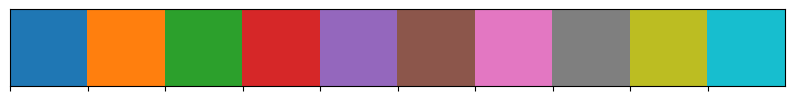

In [2]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

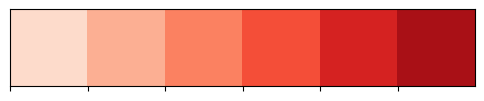

In [10]:
sns.palplot(sns.color_palette("Reds"))

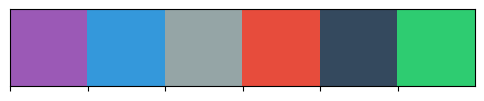

In [11]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

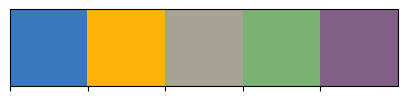

In [12]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

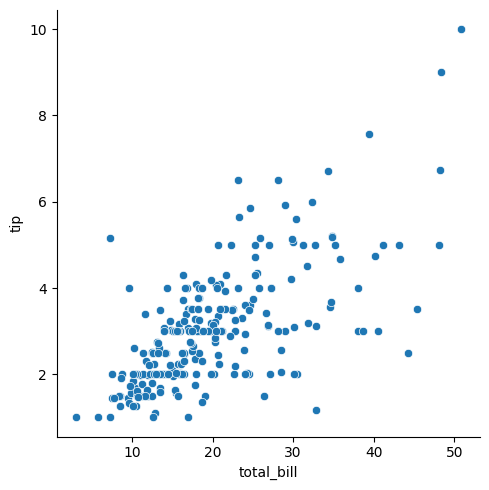

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [16]:
# 두 변수 사이의 관계 표현
tips = sns.load_dataset("tips")
tips
sns.relplot(x="total_bill", y="tip", data=tips)
plt.show()
tips[["total_bill", "tip"]].corr()

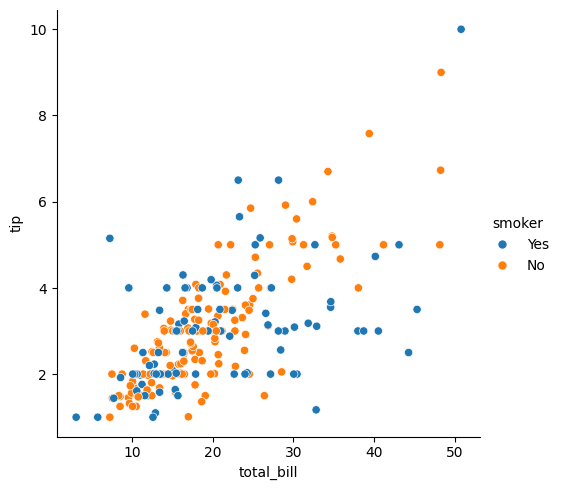

            total_bill       tip
total_bill    1.000000  0.488218
tip           0.488218  1.000000
            total_bill       tip
total_bill    1.000000  0.822183
tip           0.822183  1.000000


In [23]:
# 범주형 변수와 시각화 특성 바인딩
# sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)
# sns.scatterplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
plt.show()

print( tips[tips["smoker"] == "Yes"][["total_bill", "tip"]].corr() )
print( tips[tips["smoker"] == "No"][["total_bill", "tip"]].corr() )

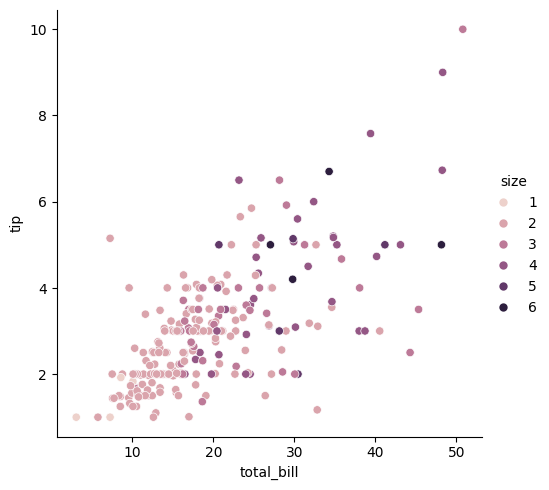

In [24]:
# 연속형 변수와 시각화 특성 바인딩
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)
plt.show()


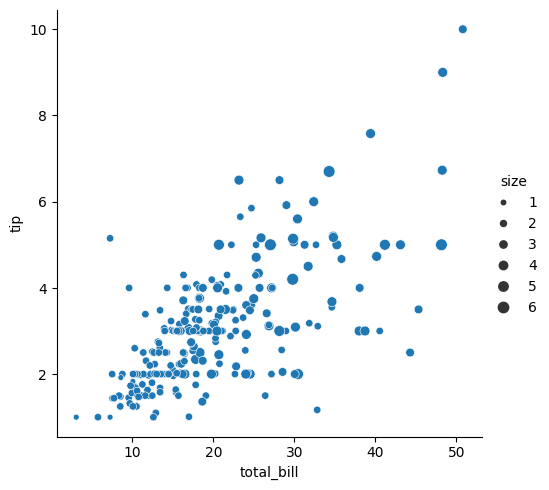

,tip,size
tip,1.000000,0.489299
size,0.489299,1.000000


In [26]:
# 연속형 변수와 시각화 특성 바인딩
sns.relplot(x="total_bill", y="tip", size="size", data=tips)
plt.show()

tips[["tip", "size"]].corr()

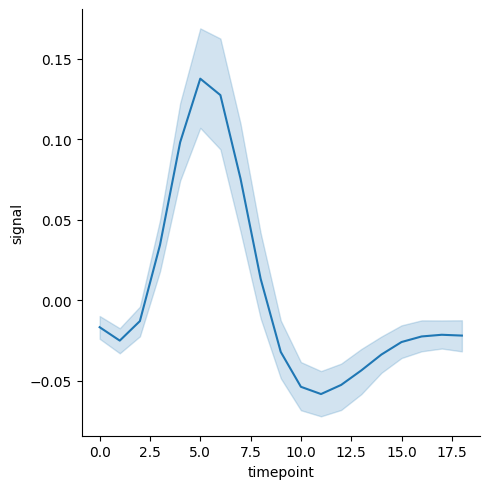

In [29]:
# 두 변수 사이의 관계
# 불확실성 표시
fmri = sns.load_dataset("fmri")
fmri
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, )
plt.show()

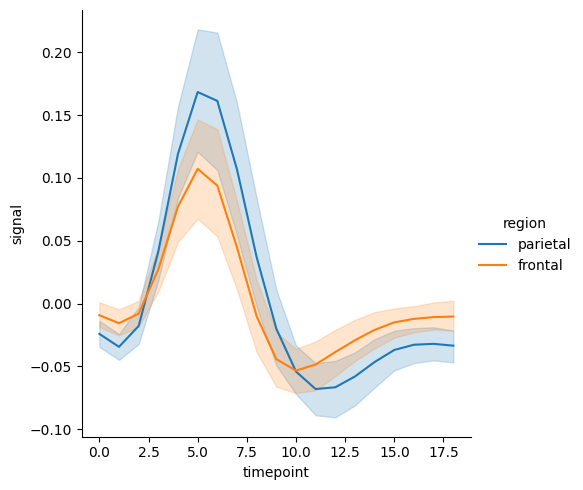

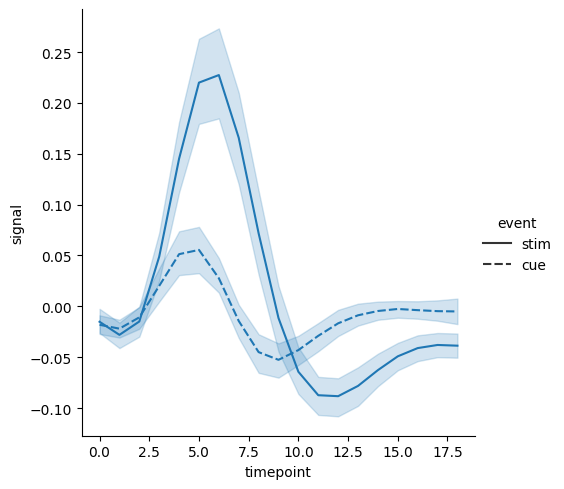

In [32]:
# 데이터와 시각화 특성 바인딩
sns.relplot(x="timepoint", y="signal", hue="region", kind="line", data=fmri)
sns.relplot(x="timepoint", y="signal", style="event", kind="line", data=fmri)
plt.show()

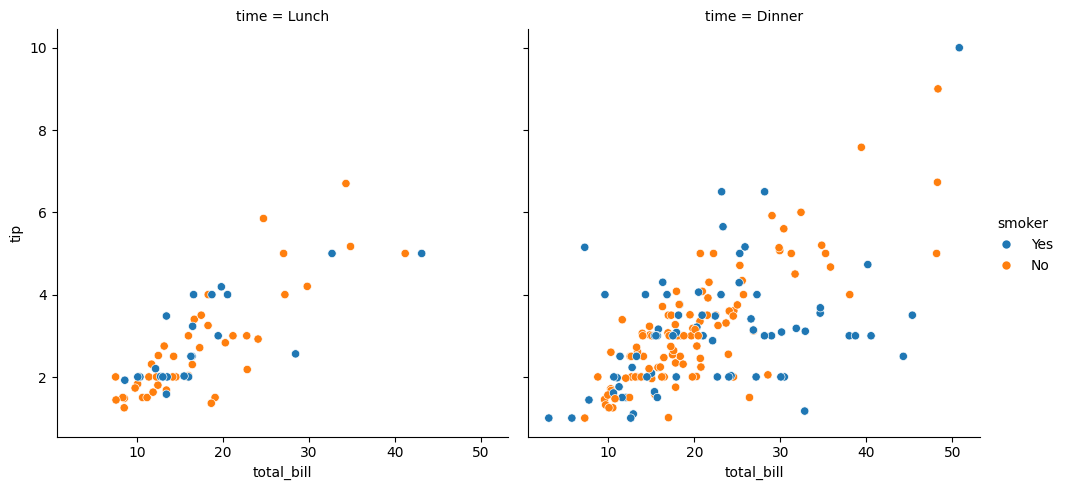

In [34]:
# 컬럼에 비교할 분류 바인딩
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)
plt.show()

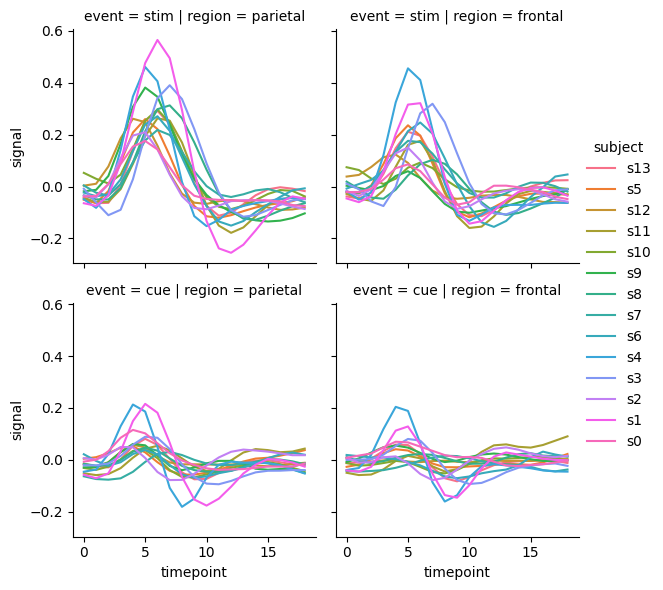

In [39]:
# 행과 열에 비교할 분류 바인딩
sns.relplot(x="timepoint", y="signal", hue="subject", 
            col="region", row="event", height=3, 
            kind="line", data=fmri)
plt.show()

In [43]:
fmri.query("region == 'frontal'") # == fmri[fmri["region"] == 'frontal']

,subject,timepoint,event,region,signal
67,s0,0,stim,frontal,-0.021452
170,s2,6,stim,frontal,0.101050
267,s10,4,stim,frontal,0.030044
268,s11,4,stim,frontal,0.075957
269,s3,0,stim,frontal,0.011056
...,...,...,...,...,...
1058,s1,8,cue,frontal,-0.136059
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939


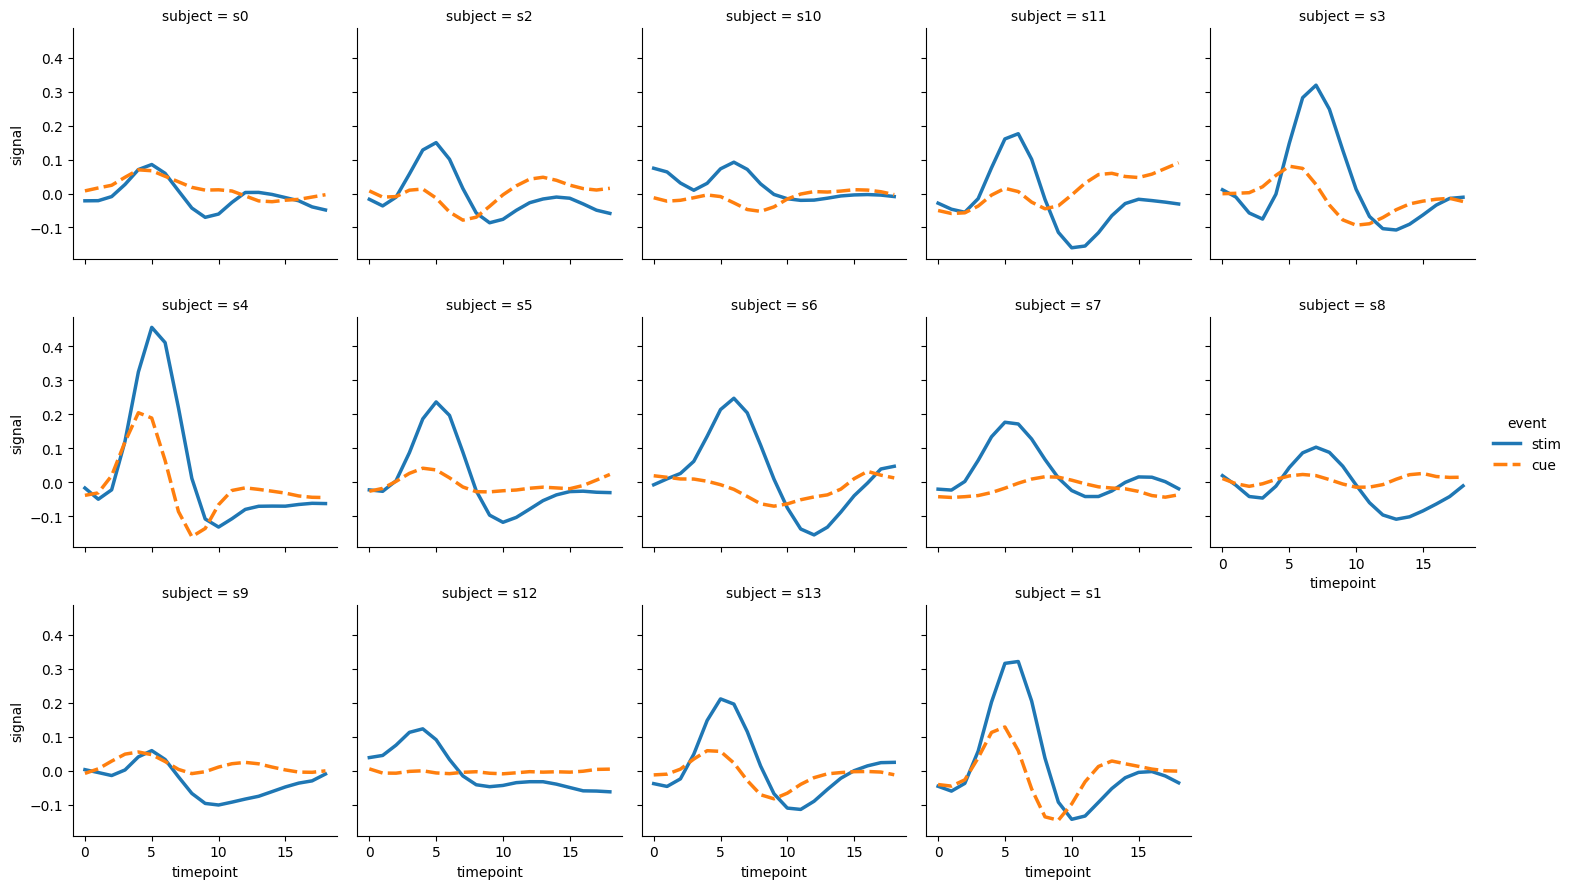

In [40]:
# 비교할 분류가 많은 경우 한 행에 표시할 최대 플롯 개수 지정 : wrap
sns.relplot(x="timepoint", y="signal", hue="event", style="event", 
            col="subject", col_wrap=5, height=3, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))
plt.show()

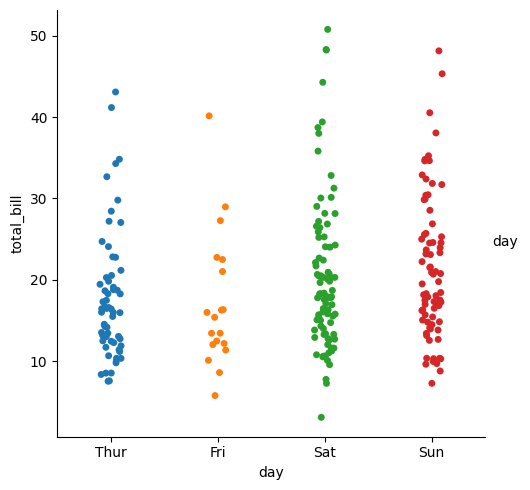

In [46]:
# 기본 범주 데이터 산점도 그래프
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", hue="day", data=tips, jitter=True); # jitter : easing overplotting
plt.show()

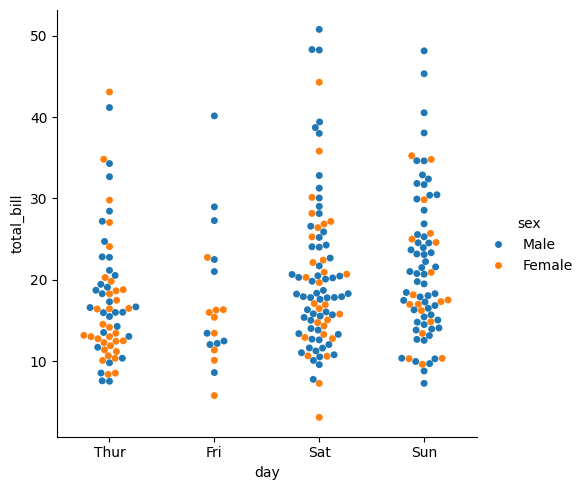

In [47]:
# 
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips); # kind="swarm" : easing overplotting
plt.show()

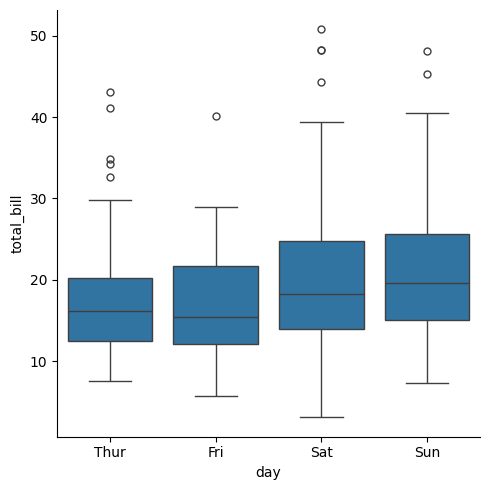

In [48]:
# 기본 박스 플롯
sns.catplot(x="day", y="total_bill", kind="box", data=tips)
plt.show()

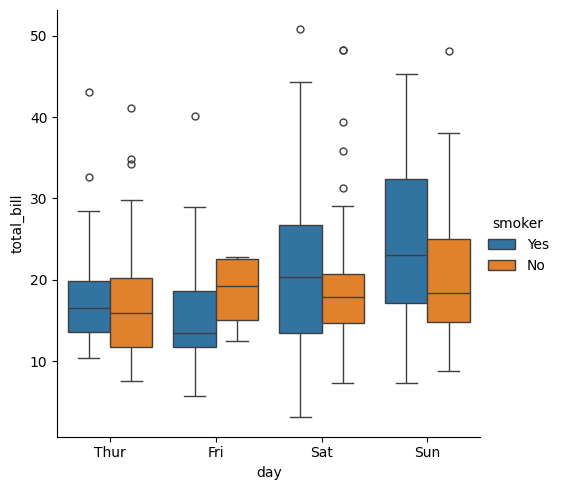

In [49]:
# 데이터와 시각화 요소 바인딩
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)
plt.show()

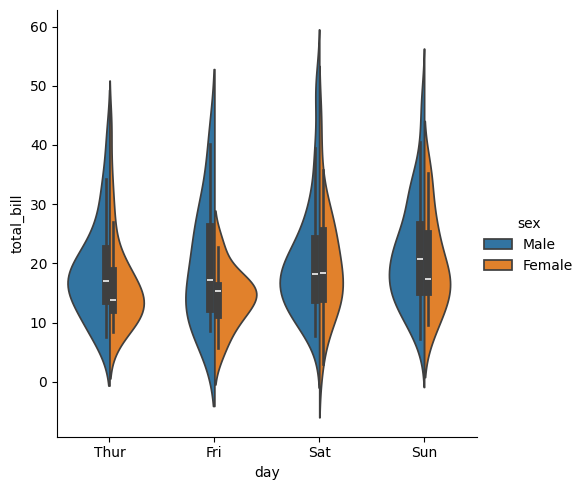

In [52]:
# 단일 바이올린 플롯
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips)
# sns.catplot(x="day", y="total_bill", kind="violin", split=True, data=tips)
plt.show()

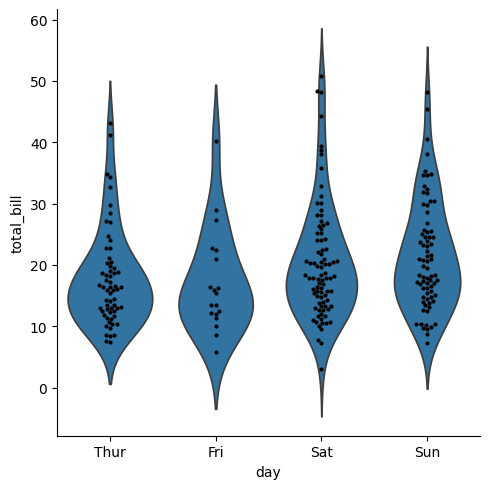

In [53]:
# 바이올린플롯과 범주데이터 산점도 그래프 병합
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)